In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa, librosa.display
import IPython.display as ipd
from scipy.io import wavfile
from librosa.feature import melspectrogram
from librosa.core import load as load_wav
from librosa import power_to_db
from librosa.display import specshow

from google.colab import drive
import pickle
import io
from tqdm import tqdm

### Data loading

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def transform_data(X, y):
  X_df = pd.DataFrame(X.items(), columns=['f_name', 'wav'])
  y_df = pd.DataFrame(y.items(), columns=['f_name', 'labels'])
  data = pd.merge(left=y_df, right=X_df, left_on='f_name', right_on='f_name')
  return data

In [0]:
def load_pkl_data(X_fname, y_fname):
  dir_name = 'drive/My Drive/DCASE2019task4/data/'
  X = pickle.load(open(dir_name + X_fname, 'rb'))
  y = pickle.load(open(dir_name + y_fname, 'rb'))
  data = transform_data(X, y)
  return data

In [0]:
classes = {0: "Alarm_bell_ringing", 1: "Speech", 2: "Dog", 3: "Cat", 4: "Vacuum_cleaner", 
           5: "Dishes", 6: "Frying", 7: "Electric_shaver_toothbrush", 8: "Blender", 9: "Running_water"}

# Weak train data
X_fname = 'dico_wav_train_weak_1505files.pkl'
y_fname = 'dico_tags_y_train_weak_1505files.pkl'

data_weak = load_pkl_data(X_fname, y_fname)

# Synthetic train data
X_fname = 'dico_wav_train_synthetic_2045files.pkl'
y_fname = 'dico_tags_y_train_synthetic_2045files.pkl'

data_synthetic = load_pkl_data(X_fname, y_fname)

# Validation data
X_fname = 'dico_wav_validation_1122files.pkl'
y_fname = 'dico_tags_y_validation_1122files.pkl'

data_val = load_pkl_data(X_fname, y_fname)


### Getting features

In [0]:
def plot_spectrogramm(log_mel, sr=22050):
  plt.figure(figsize=(15, 5))
  specshow(log_mel, y_axis='mel', fmax=sr//2, x_axis='time', cmap='viridis')
  plt.colorbar(format='%+2.0f дБ')
  plt.title('Логарифм мелспектрограммы')
  plt.tight_layout()
  plt.show()

In [0]:
# Получение фич
def getting_features(data_wav, sr=22050, fft_size=2048, overlap=8, mels = 64):
  hop = fft_size // overlap
  features = []
  for y in tqdm(data_wav):
    mel_spec = melspectrogram(y, n_fft=fft_size, hop_length=hop, n_mels=mels, fmax=sr // 2)
    log_mel_spec = power_to_db(mel_spec, ref=np.max)
    features.append(log_mel_spec)

  return features

In [0]:
# Сохранение в формате pkl
def save_data(X, y, X_fname, y_fname):
  dir_name = 'drive/My Drive/DCASE2019task4/data/pickle/'
  pickle.dump(X, open(dir_name + X_fname, 'wb'))
  pickle.dump(y, open(dir_name + y_fname, 'wb'))

In [30]:
features_weak = getting_features(data_weak['wav'])
features_synthetic = getting_features(data_synthetic['wav'])
features_val = getting_features(data_val['wav'])

100%|██████████| 1122/1122 [01:27<00:00, 12.87it/s]


In [0]:
save_data(features_weak, data_weak['labels'], 'X_weak_train.pkl', 'y_weak_train.pkl')
save_data(features_synthetic, data_synthetic['labels'], 'X_synthetic_train.pkl', 'y_synthetic_train.pkl')
save_data(features_val, data_val['labels'], 'X_validation.pkl', 'y_validation.pkl')

{0: 'Alarm_bell_ringing', 1: 'Speech', 2: 'Dog', 3: 'Cat', 4: 'Vacuum_cleaner', 5: 'Dishes', 6: 'Frying', 7: 'Electric_shaver_toothbrush', 8: 'Blender', 9: 'Running_water'}
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


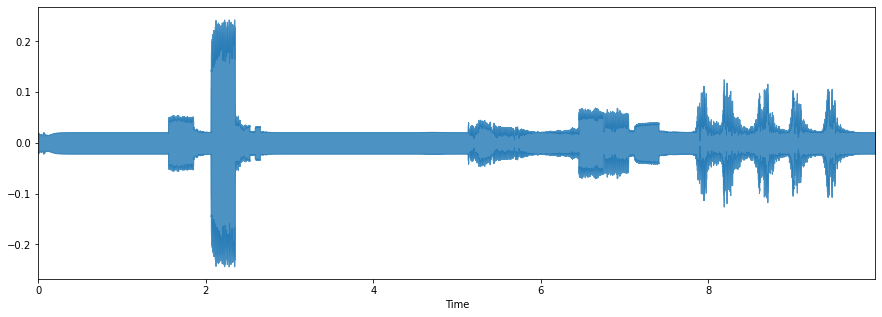

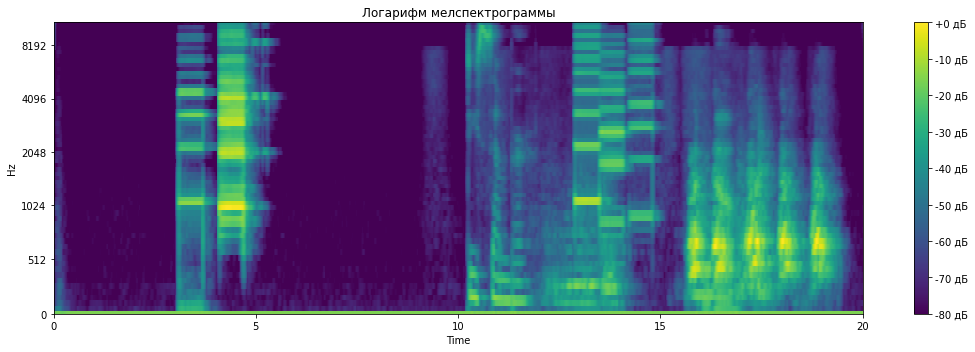

In [41]:
i = 1000
wav = data_synthetic['wav'][i]
label = data_synthetic['labels'][i]
log_mel = features_synthetic[i]

print(classes)
print(label)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(wav, sr, alpha=0.8)
plot_spectrogramm(log_mel)
ipd.Audio(wav, rate=sr)